In [1]:
from ogs6py.ogs import OGS
import vtuIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 16})

In [2]:
betas = np.linspace(0,np.pi/2,45)

In [3]:
UCS = np.array([])
pts = {"pt0": (0.0,0.0,0.0)}

for i in betas:
    angle = int(np.round(i*180/np.pi,0))
    #print("Generating input for %i °" %angle)
    ofile="triax_" + str(angle) + ".prj"
    model = OGS(INPUT_FILE="triax_original.prj", PROJECT_FILE=ofile, ogs_mode="silent")
    model.replace_text('%.12f %.12f' %(np.cos(i),np.sin(i)), xpath="./parameters/parameter[name='e0']/values")
    model.replace_text('%.12f %.12f' %(-np.sin(i),np.cos(i)), xpath="./parameters/parameter[name='e1']/values")
    model.write_input()
    #
    print("Running simulation")
    model.run_model(path='~/ogs_release/bin')
    #
    print("Getting results")
    pvd = vtuIO.PVDIO("triax_0.pvd", dim=2)
    results = {}
    results["AxialStress"] = pvd.read_time_series("sigma", pts=pts)
    ucs = results['AxialStress']['pt0'].T[1][-1]
    UCS = np.append(UCS,-ucs)
    print("Removing created input")
    !rm $ofile

Running simulation
OGS finished with project file triax_0.prj.
Execution took 0.06012892723083496 s
Getting results
Removing created input
Running simulation
OGS finished with project file triax_2.prj.
Execution took 0.09870600700378418 s
Getting results
Removing created input
Running simulation
OGS finished with project file triax_4.prj.
Execution took 0.0819556713104248 s
Getting results
Removing created input
Running simulation
OGS finished with project file triax_6.prj.
Execution took 0.10850691795349121 s
Getting results
Removing created input
Running simulation
OGS finished with project file triax_8.prj.
Execution took 0.06510043144226074 s
Getting results
Removing created input
Running simulation
OGS finished with project file triax_10.prj.
Execution took 0.10677719116210938 s
Getting results
Removing created input
Running simulation
OGS finished with project file triax_12.prj.
Execution took 0.10740447044372559 s
Getting results
Removing created input
Running simulation
OGS fin

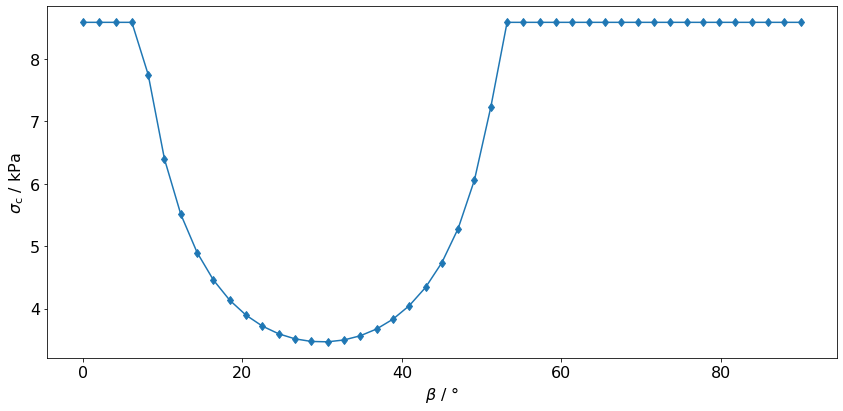

In [4]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(np.rad2deg(betas),UCS/1.e3,marker='d')
ax.set_xlabel('$\\beta$ / °')
ax.set_ylabel('$\\sigma_\\mathrm{c}$ / kPa')
fig.tight_layout();